In [6]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [20]:
labels = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']
data = pd.read_csv("all.csv", header=None, names=labels)
#Show data
data.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [21]:
#Show data types
data.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [22]:
#Show data shape. (Num rows and columns)
data.shape

(6000, 10)

In [18]:
#Show columns of the data
data.columns

Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

In [56]:
# querying data. We are looking at books with rating less than 4
# False indicates that the rating is not less than 4 and true vice versa
data.rating < 4

0       False
1       False
2        True
3       False
4       False
        ...  
5995    False
5996     True
5997     True
5998     True
5999    False
Name: rating, Length: 6000, dtype: bool

In [57]:
# This represents the number of books with rating less than 3
np.sum(data.rating < 3)

4

In [58]:
# The fraction of books with rating less than 3
np.sum(data.rating < 3) / data.shape[0]

0.0006666666666666666

In [59]:
#The same thing above can be done in this way as well
(data.rating < 3).mean()
#This works because (data.rating < 3) is a series of true or false and hence the frafction of true is just the mean
# as true = 1 and false = 0

0.0006666666666666666

In [60]:
#Filtering data like SQL can also be done.
data.query("rating < 3")
# This shows us the books with rating less than 3

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2609,2.90,8,NaN,good_reads:book,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,dir27/19546932-how-to-be-a-perfect-girl.html,31,How To Be A Perfect Girl
3738,2.00,368,0983650322,good_reads:book,https://www.goodreads.com/author/show/9414.Vic...,2011.0,/genres/young-adult|/genres/science-fiction|/g...,dir38/12393909-revealing-eden.html,688,"Revealing Eden (Save the Pearls, #1)"
5844,2.97,1399,0395083621,good_reads:book,https://www.goodreads.com/author/show/30691.Ad...,1925.0,/genres/history|/genres/non-fiction|/genres/bi...,dir59/54270.Mein_Kampf.html,12417,Mein Kampf
5979,2.77,800,0060988649,good_reads:book,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,dir60/24929.Lost.html,11128,Lost


In [61]:
# We can also do the the query in this manner.
data[data.rating < 3]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2609,2.90,8,NaN,good_reads:book,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,dir27/19546932-how-to-be-a-perfect-girl.html,31,How To Be A Perfect Girl
3738,2.00,368,0983650322,good_reads:book,https://www.goodreads.com/author/show/9414.Vic...,2011.0,/genres/young-adult|/genres/science-fiction|/g...,dir38/12393909-revealing-eden.html,688,"Revealing Eden (Save the Pearls, #1)"
5844,2.97,1399,0395083621,good_reads:book,https://www.goodreads.com/author/show/30691.Ad...,1925.0,/genres/history|/genres/non-fiction|/genres/bi...,dir59/54270.Mein_Kampf.html,12417,Mein Kampf
5979,2.77,800,0060988649,good_reads:book,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,dir60/24929.Lost.html,11128,Lost


In [62]:
#Just like SQL combine queries using & 
data[(data.rating > 4) & (data.year < 0)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables
1882,4.02,377,0872205541,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir19/22632.The_Trial_and_Death_of_Socrates.html,18712,The Trial and Death of Socrates
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390.0,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology
5367,4.07,133,0872206335,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-360.0,/genres/philosophy|/genres/classics|/genres/no...,dir54/30292.Five_Dialogues.html,9964,Five Dialogues


In [64]:
data.query("rating > 4 & year < 0")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables
1882,4.02,377,0872205541,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir19/22632.The_Trial_and_Death_of_Socrates.html,18712,The Trial and Death of Socrates
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390.0,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology
5367,4.07,133,0872206335,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-360.0,/genres/philosophy|/genres/classics|/genres/no...,dir54/30292.Five_Dialogues.html,9964,Five Dialogues


In [66]:
# In our dataset, some values might be null and and cause problems while learning or while conversion of our data.
# Its a good practice to remove all the data which have some null value.
#Check for null value
data[data.rating.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


In [69]:
#Here we see two values of rating are null, so lets get rid of them
data = data[data.rating.notnull()]
data.shape
#As we removed two entries from our data (The ones having null rating), we will now have 5998 number of entries instead of 6000

(5998, 10)

In [70]:
#check for other null values
data[data.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


In [71]:
#As there are 5 entries which are null, lets remove them
data = data[data.year.notnull()]
data.shape
#As we further removed 5 values which are null, we get 5993 entries instead of 5998

(5993, 10)

In [74]:
data.dtypes
#As here we see that review_count is of type object, rating count is of type object and year is of float,
#Lets change those types

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [77]:
data['rating_count'] = data.rating_count.astype(int)
data['year'] = data.year.astype(int)
data['review_count'] = data.review_count.astype(int)

In [78]:
#Since there was no error in the step above, the data must have changed succesfully. Lets check
data.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

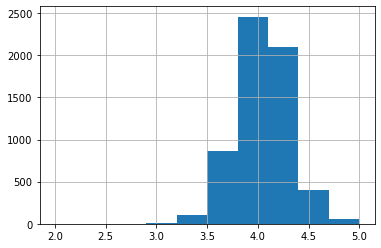

In [81]:
#This visulaisation process is to help us understand the data better.
# The histogram below, shows the distribution of rating attribute. The y axis shows 
# shows the number of books while x axis shows the rating
data.rating.hist()

In [82]:
sns.set_context("notebook")
meanrat=data.rating.mean()
#you can get means and medians in different ways
print (meanrat, np.mean(data.rating), data.rating.median())
with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()

SyntaxError: invalid syntax (<ipython-input-82-142a4a0524aa>, line 4)